In [1]:
# DEFINING REQUIRED PACKAGES ---------------------------------------
import matplotlib.pyplot as plt #import matplotlib to create plots
import scipy.optimize as opt; #allows for curve fitting
from scipy.odr import *
import pandas as pd #importing pandas to use dataframes
import numpy as np
from scipy.constants import g, pi
plt.style.reload_library()
plt.style.use(['science', 'grid'])
from scipy.odr import ODR, Model, Data, RealData
from scipy.optimize import curve_fit
import ipywidgets as widgets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [50]:
def LinearPlot(xdata,ydata,color,x_label,y_label):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    #plt.errorbar(xdata,ydata,yerr=error_y,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    #plt.errorbar(xdata,ydata,xerr=error_x,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    
    plt.scatter(xdata,ydata, color=color, marker=',', label='Peak: V = 450V')
    plt.legend(loc = 'upper right', fontsize = 12)
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    #plt.xticks(np.arange(min(xdata), max(xdata), (max(xdata)-min(xdata))/5))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.axvline(x=450, color='red', linestyle='--')
    plt.savefig("Figures/figure.png")
    
# DEFINING A FUNCTION THAT RETURNS THE UNCERTAINTY USING VARIATIONAL METHOD
def uncertainty_var(values, deltas, function):
    values, deltas = np.array(values), np.array(deltas)
    delta_matrix = deltas*np.identity(values.shape[0])
    sum = 0
    for delta in delta_matrix:
        sum += (0.5*(abs(function(values + delta) - function(values)) + abs(function(values-delta) - function(values))))**2
    return np.sqrt(sum)
    
def noiseRatio(param): #[L,D]
    return (param[0]-param[1])/param[1]

In [42]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1iYbA_X-BAgKxj-p5xsn6TMuqubb39IdXJCk7EbgtABg'
workSheetName = 'PreLab2'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :9]
#df['Error noise'] = df.apply(lambda x: uncertainty_var([x['Light Count Rate- L'], x['Dark Count Rate - D']], [x['L-Uncertainty'], x['D-Uncertainty']], noiseRatio), axis=1)
df

,Voltage (V),Uncertainty V (V),Light Count Rate- L,L-Uncertainty,Dark Count Rate - D,D-Uncertainty,Noise ratio,Unnamed: 7,Unnamed: 8
0,410,1,1062,32.588341,1,1.000000,1061.000000,NaN,NaN
1,420,1,2366,48.641546,1,1.000000,2365.000000,NaN,NaN
2,430,1,4045,63.600314,1,1.000000,4044.000000,NaN,NaN
3,440,1,6762,82.231381,1,1.000000,6761.000000,NaN,NaN
4,450,1,9041,95.084173,1,1.000000,9040.000000,NaN,NaN
5,460,1,11582,107.619701,2,1.414214,5790.000000,NaN,NaN
6,470,1,13768,117.337121,2,1.414214,6883.000000,NaN,NaN
7,480,1,15597,124.887950,3,1.732051,5198.000000,NaN,NaN
8,490,1,17482,132.219514,4,2.000000,4369.500000,NaN,NaN
9,510,1,19494,139.620915,6,2.449490,3248.000000,NaN,NaN


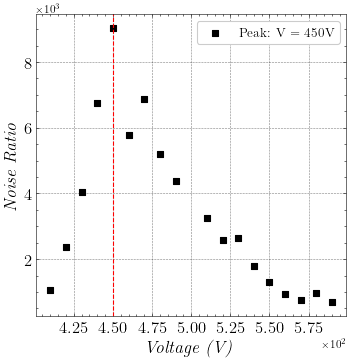

In [51]:
#xdata, ydata, error_x, error_y = df['Voltage (V)'], df['Noise ratio'], df['Uncertainty V (V)'], df['Error noise']
xdata, ydata = df['Voltage (V)'], df['Noise ratio']
LinearPlot(xdata,ydata,'black','Voltage (V)','Noise Ratio')